## Body

### State 0: Data collection

Daily closing prices from 500 publicly traded U.S. securities were sampled for this notebook

In [1]:
from mlpairs import OpticsPairs
import pandas as pd
import backtrader as bt
import backtrader.analyzers as btanalyzers
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

stock_prices = pd.read_csv('sample_US_equity_close.csv',
                           index_col=0,
                           parse_dates=True)
train = stock_prices[:'2020']

train_start_date = str(train.index[0])[:10]
train_end_date = str(train.index[-1])[:10]

print(train_start_date)
print(train_end_date)


test = stock_prices['2021':]

test_start_date = str(test.index[0])[:10]
test_end_date = str(test.index[-1])[:10]

print(test_start_date)
print(test_end_date)

train

2010-01-04
2020-12-31
2021-01-04
2022-12-30


,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,XOM,UNH,JNJ,V,...,MHK,DVA,AIZ,DXC,NWL,ALK,LNC,LUMN,TECH,TAP
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515212,23.683075,15.610239,15.684434,6.695000,4.242310,41.998310,25.983179,44.278534,20.094738,...,48.310001,29.959999,23.222075,17.669441,10.288642,7.839311,19.833183,12.972063,14.882518,33.836285
2010-01-05,6.526477,23.690720,15.541497,15.615365,6.734500,4.304259,42.162292,25.941975,43.765083,19.864475,...,48.119999,29.705000,23.915041,17.663315,10.227718,8.268705,20.247017,12.993295,14.754669,33.431015
2010-01-06,6.422665,23.545334,15.149715,15.221722,6.612500,4.331791,42.526711,26.197435,44.121067,19.597733,...,47.930000,29.530001,23.845736,17.727585,10.410480,8.194520,20.553562,12.483757,14.715665,33.394157
2010-01-07,6.410792,23.300467,14.797037,14.867367,6.500000,4.246898,42.393082,27.202810,43.806171,19.780115,...,48.770000,29.785000,24.138321,17.550097,10.708307,8.151803,21.044210,12.363444,14.750337,32.834152
2010-01-08,6.453412,23.461163,14.994298,15.065566,6.676000,4.256076,42.223019,26.947350,43.956768,19.834835,...,49.639999,30.500000,24.153725,17.504194,10.674462,7.989937,20.722216,12.328061,14.722172,32.789944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.404572,218.847717,86.942497,86.708000,158.634506,129.702835,37.694798,331.815369,144.914520,205.868561,...,138.720001,115.129997,128.027695,22.900000,19.444906,52.250000,46.195187,8.541453,79.883667,43.524639
2020-12-28,135.068604,221.018997,88.804497,88.697998,164.197998,128.767014,37.821655,336.839478,145.598862,209.745255,...,140.490005,115.449997,128.761398,24.059999,19.463234,52.580002,46.334496,8.524129,78.435623,43.534210
2020-12-29,133.270172,220.223190,87.935997,87.888000,166.100006,129.198730,37.395782,338.202606,146.501770,211.461655,...,139.470001,116.000000,127.940826,23.660000,19.224985,52.029999,45.656521,8.480815,78.217049,43.591644


In [2]:
test

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,XOM,UNH,JNJ,V,...,MHK,DVA,AIZ,DXC,NWL,ALK,LNC,LUMN,TECH,TAP
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,127.874939,213.876373,86.412003,86.306503,159.331497,130.898163,37.604187,340.295959,148.744812,214.805649,...,136.110001,116.500000,127.535385,25.920000,19.893919,49.240002,45.340752,8.420176,78.145012,43.696941
2021-01-05,129.455963,214.082687,87.045998,87.002502,160.925507,133.805389,39.416435,335.719727,150.493637,211.599731,...,138.589996,116.550003,127.573975,26.879999,20.031374,49.860001,45.610081,8.602094,78.736145,44.989182
2021-01-06,125.098267,208.531647,86.764503,86.143997,156.919006,125.917160,40.422234,349.808655,151.909821,209.735367,...,142.970001,120.550003,133.173157,26.450001,20.764454,51.520000,48.823498,9.121855,82.191109,47.142918
2021-01-07,129.367020,214.465866,89.362503,88.717003,158.108002,133.199005,40.739376,355.416992,152.423035,210.909241,...,144.309998,122.209999,134.515015,28.910000,20.746124,51.320000,48.879223,9.104531,83.418091,47.047199
2021-01-08,130.483627,215.772568,90.360497,89.891502,159.134995,132.527710,41.192440,353.820160,152.109390,212.526978,...,143.679993,123.889999,133.810303,29.600000,21.140152,50.980000,48.130260,9.121855,81.845856,47.382225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,238.729996,89.809998,89.230003,85.250000,152.059998,108.680000,531.309998,177.479996,205.830002,...,97.959999,73.760002,125.029999,26.530001,12.990000,43.310001,29.705101,5.240000,82.730003,51.930000
2022-12-27,130.029999,236.960007,87.930000,87.389999,83.040001,141.210007,110.190002,531.989990,177.429993,206.289993,...,98.209999,73.900002,124.570000,26.690001,13.040000,42.259998,29.369898,5.280000,82.209999,52.330002
2022-12-28,126.040001,234.529999,86.459999,86.019997,81.820000,140.360001,108.379997,528.450012,176.660004,204.990005,...,96.360001,72.800003,123.959999,25.980000,12.920000,41.299999,29.113564,5.090000,80.690002,51.380001


### State 1: Dimensionality Reduction  
### Calculate return series

In [4]:
op = OpticsPairs(train)
op.returns.head()

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,XOM,UNH,JNJ,V,...,MHK,DVA,AIZ,DXC,NWL,ALK,LNC,LUMN,TECH,TAP
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.001729,0.000323,-0.004404,-0.004404,0.005900,0.014603,0.003904,-0.001586,-0.011596,-0.011459,...,-0.003933,-0.008511,0.029841,-0.000347,-0.005921,0.054774,0.020866,0.001637,-0.008591,-0.011977
2010-01-06,-0.015906,-0.006137,-0.025209,-0.025209,-0.018116,0.006396,0.008643,0.009847,0.008134,-0.013428,...,-0.003948,-0.005891,-0.002898,0.003639,0.017869,-0.008972,0.015140,-0.039215,-0.002644,-0.001102
2010-01-07,-0.001849,-0.010400,-0.023280,-0.023280,-0.017013,-0.019598,-0.003142,0.038377,-0.007137,0.009306,...,0.017526,0.008635,0.012270,-0.010012,0.028608,-0.005213,0.023872,-0.009638,0.002356,-0.016770
2010-01-08,0.006648,0.006897,0.013331,0.013331,0.027077,0.002161,-0.004012,-0.009391,0.003438,0.002766,...,0.017839,0.024005,0.000638,-0.002615,-0.003161,-0.019856,-0.015301,-0.002862,-0.001909,-0.001346
2010-01-11,-0.008821,-0.012720,-0.001512,-0.001512,-0.024041,-0.014016,0.011220,0.006728,0.000156,-0.002874,...,-0.004230,0.012951,0.007013,-0.006119,-0.010780,-0.006190,0.013318,0.010333,-0.006476,0.011461


### Apply PCA

Principal component analysis is applied to the scaled return series. The below graphs plot the loadings on of each security on the first five principal components. It is unsurprising that nearly every security has a similar loading on the first principal component. This component is generally interpreted as the “market” component of financial instruments which explains much of the variation in price movements across securities. Because our sample data consist of publicly traded U.S. equity listings, we expect to see the presence of this first principal component.

### Step 1: Standardize Data

<center> <font size="3"> $ z = \frac{x - \mu}{\sigma} $ </font> </center>

### Step 2: Compute Covariance Matrix

<center> <font size="3"> $ cov(X, Y) = \frac{1}{N-1}\displaystyle\sum_{i=1}^{N}(X_i-\bar{x})(Y_i-\bar{y}) $ </font> </center>

### Step 3: Compute Eigenvectors and Eigenvalues


<center> <font size='3'> $A\overrightarrow{v} = \lambda\overrightarrow{v}$ </font></center>
<center> <font size='3'> $ \overrightarrow{v}(A - \lambda I) = 0$ </font></center>
<center> <font size='3'> Where $A$ is the covariance matrix, $I$ is the identity matrix, $\overrightarrow{v}$ are eigenvectors, and $\lambda$ are eigenvalues. </font></center>


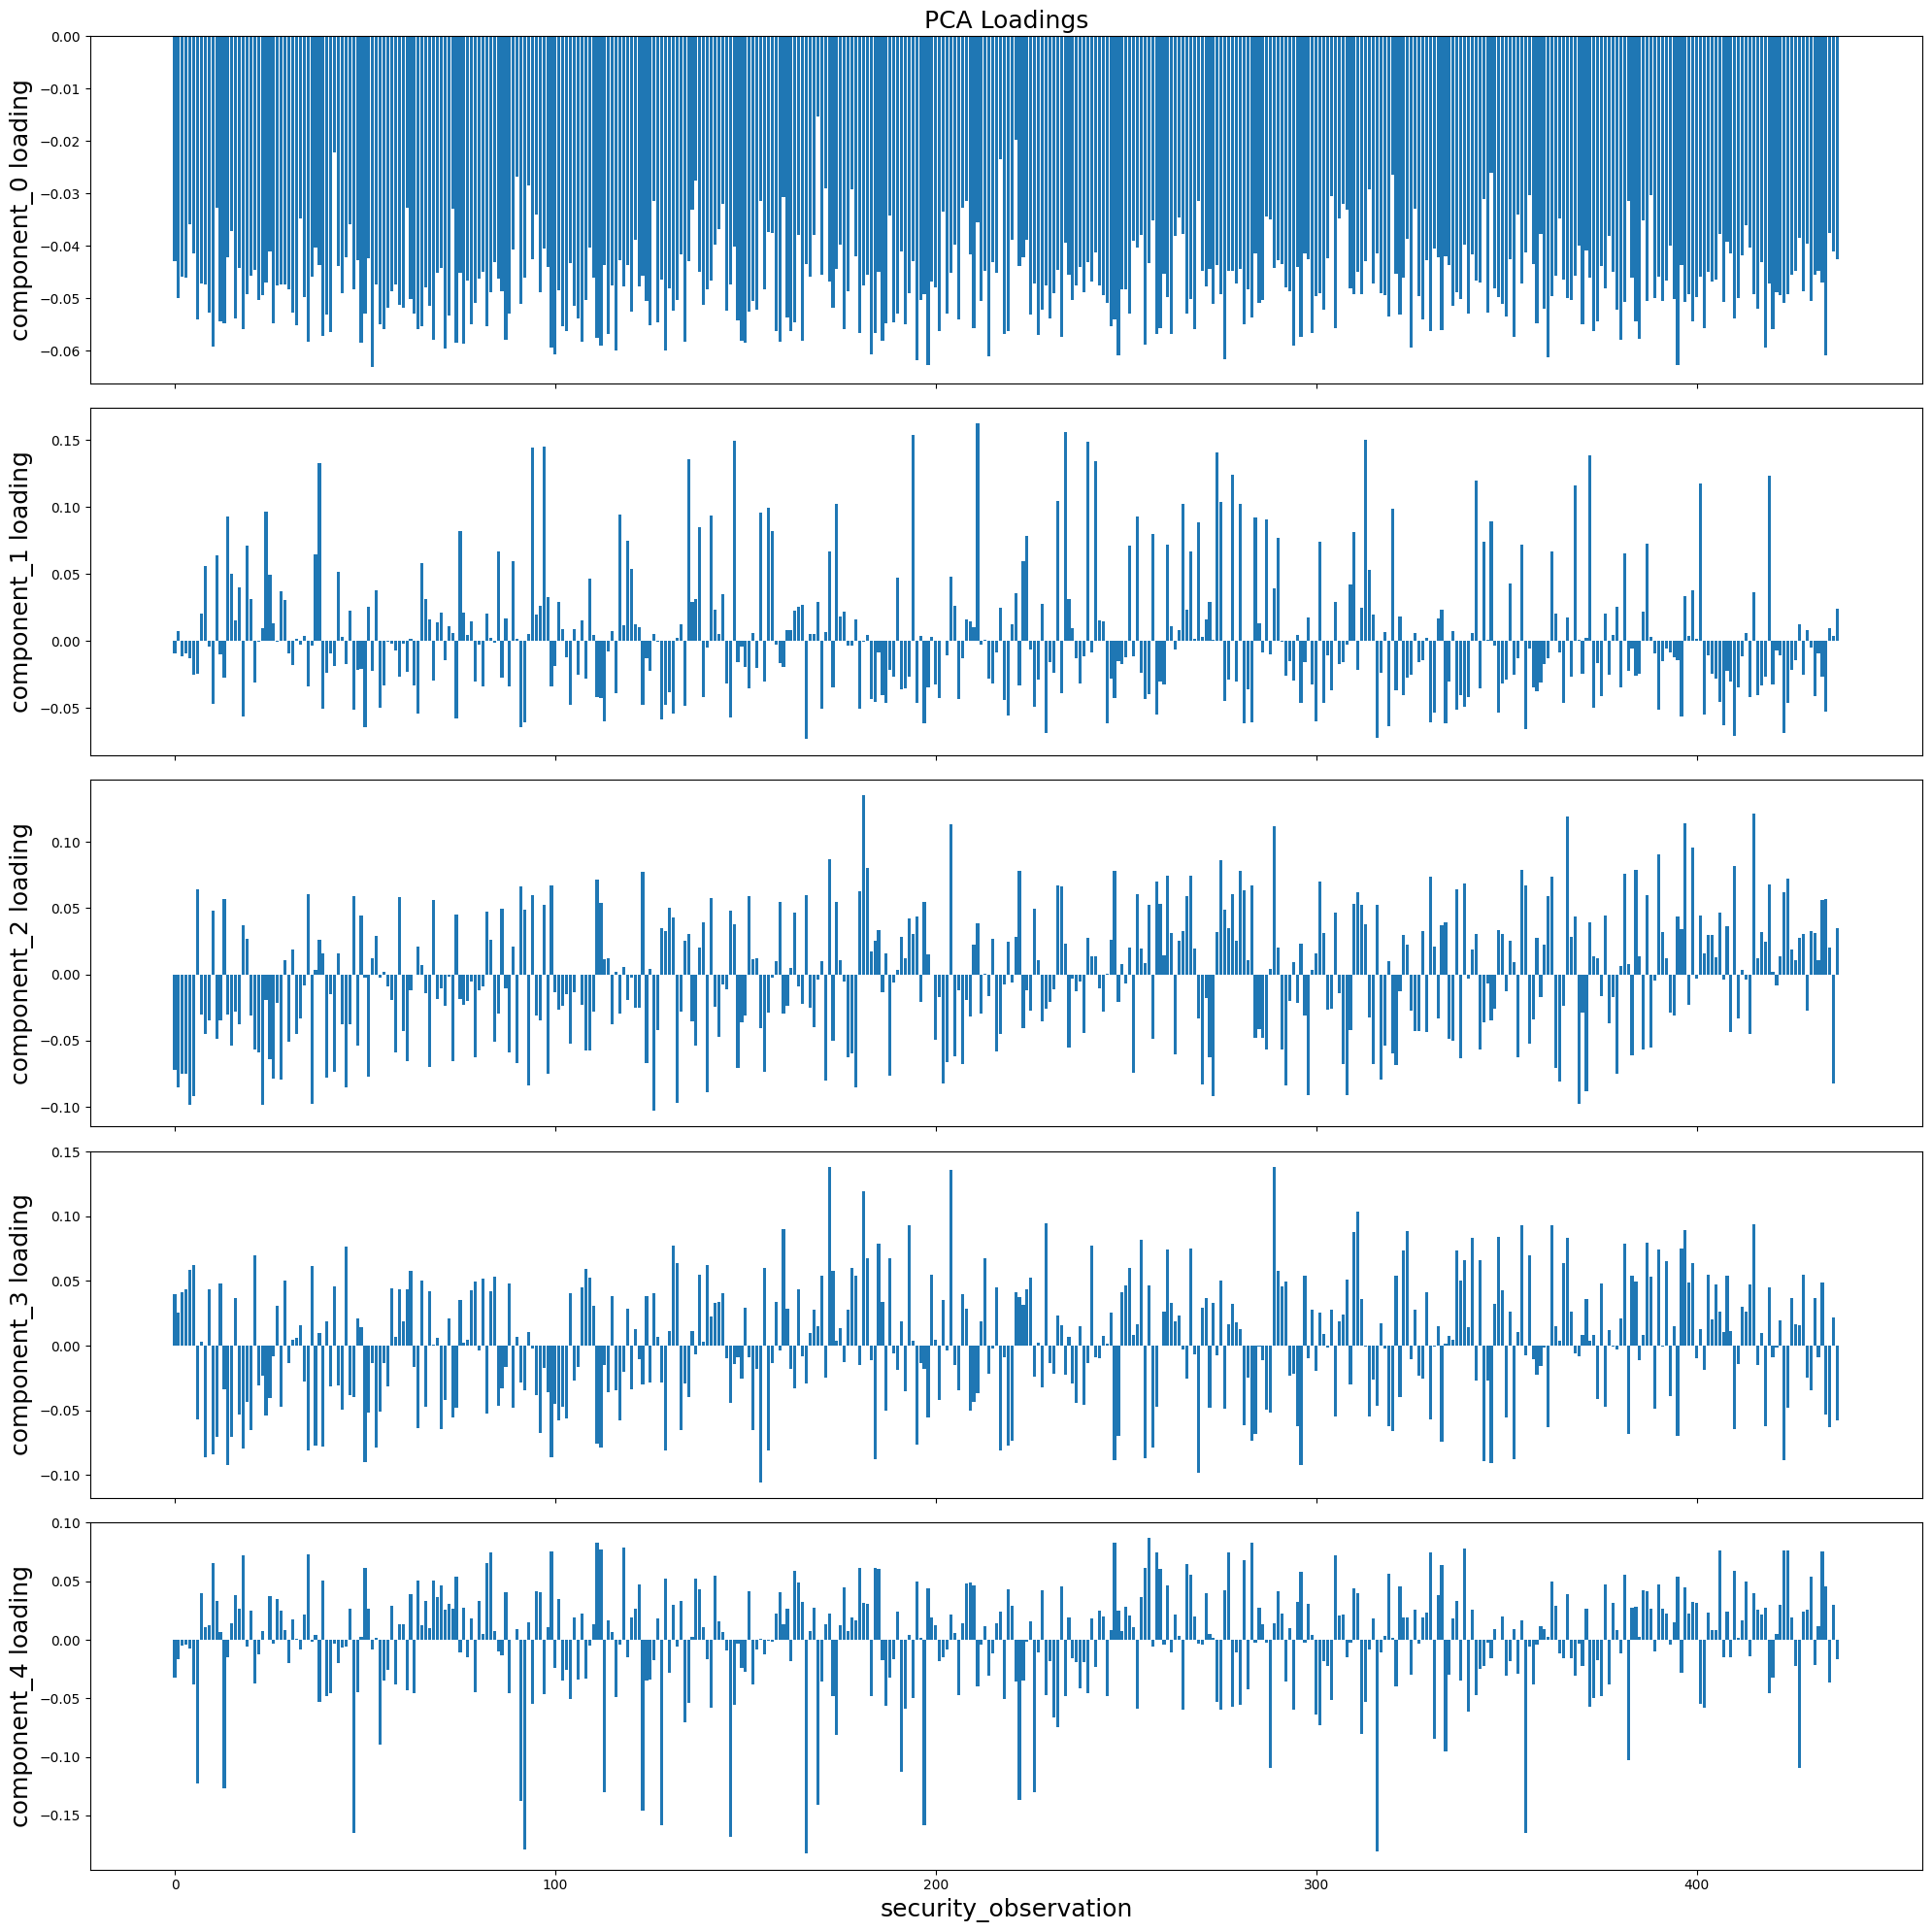

In [5]:
op.reduce_PCA()
op.plot_loadings()

Implementing PCA reduced the dimensions of our data from 2264x600 to 10x600. Below we chart the cumulative variance explained by the 10 dimensions in component space. We see the “market” component explains roughly 20% of the variance in price movements.


Total variance explained: 56.00000000000001%


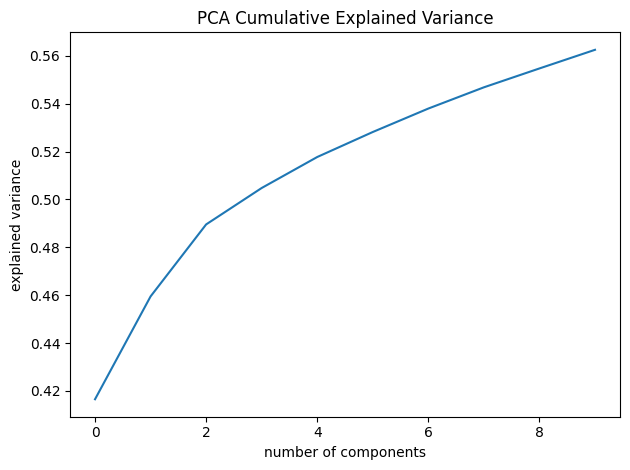

In [6]:
import numpy as np 
op.plot_explained_variance()
total_variance_explained = np.cumsum(op.explained_variance_ratio_)[-1]
print(f"Total variance explained: {round(total_variance_explained, 2)*100}%")

## State 2: Unsupervised Learning
### Apply OPTICS


Unlike other clustering algorithms, OPTICS computes an augmented cluster-ordering of the data rather than clustering the data explicitly. This frees the algorithm from relying on global parameters that might be heavily influenced by one cluster, but not accurately describe other clusters. Ankerst et. al state, “It is a versatile basis for both automatic and interactive
cluster analysis” [2]. 

A point $p$ is considered a core point if at least $MinPts$ are found within its $\epsilon$-neighborhood. Each point is given a core-dist which denotes the distance to the nearest $MinPts$th closest point. The calculation for core-dist is described below:

<center> ${\displaystyle {\text{core-dist}}_{\mathit {\varepsilon ,MinPts}}(p)={\begin{cases}{\text{UNDEFINED}}&{\text{if }}|N_{\varepsilon }(p)|<{\mathit {MinPts}}\\{\mathit {MinPts}}{\text{-th smallest distance in }}N_{\varepsilon }(p)&{\text{otherwise}}\end{cases}}}$ </center>

The reachability-distance of another point $o$ from a point $p$ is either the distance between $o$ and $p$, or the core distance of $p$, whichever is bigger. The calculation for core-dist is described below:

<center> ${\displaystyle {\text{reachability-dist}}_{\mathit {\varepsilon ,MinPts}}(o,p)={\begin{cases}{\text{UNDEFINED}}&{\text{if }}|N_{\varepsilon }(p)|<{\mathit {MinPts}}\\\max({\text{core-dist}}_{\mathit {\varepsilon ,MinPts}}(p),{\text{dist}}(p,o))&{\text{otherwise}}\end{cases}}}$ </center>

If $p$ and $o$ are nearest neighbors, this is the ${\displaystyle \varepsilon '<\varepsilon }$ we need to assume to have $p$ and $o$ belong to the same cluster.

### Generate clusters and find potential trading pairs

The OPTICS algorithm identified 323 potential pairs of securities that share a common label generated from unsupervised learning.


In [7]:
op.find_pairs()
op.pairs

Found 1207 potential pairs


0        (AMAT, ADI)
1       (AMAT, LRCX)
2       (AMAT, KLAC)
3       (AMAT, MCHP)
4        (ADI, LRCX)
            ...     
1202     (CMS, EVRG)
1203      (CMS, LNT)
1204     (ATO, EVRG)
1205      (ATO, LNT)
1206     (EVRG, LNT)
Length: 1207, dtype: object

To visually inspect the clusters, we plot the loadings of the first two and first three principal components from each security. We can clearly see one cluster of securities that stands out from the rest in the upper left of the 2-dimensional graph. Additionally, when adding a third principal component, we can more easily see other clusters group together along the z-axis.

The light points share a common label indicate data points considered noise and are excluded and the corresponding securities are excluded from the potential pairs list. 


### Plot clusters found

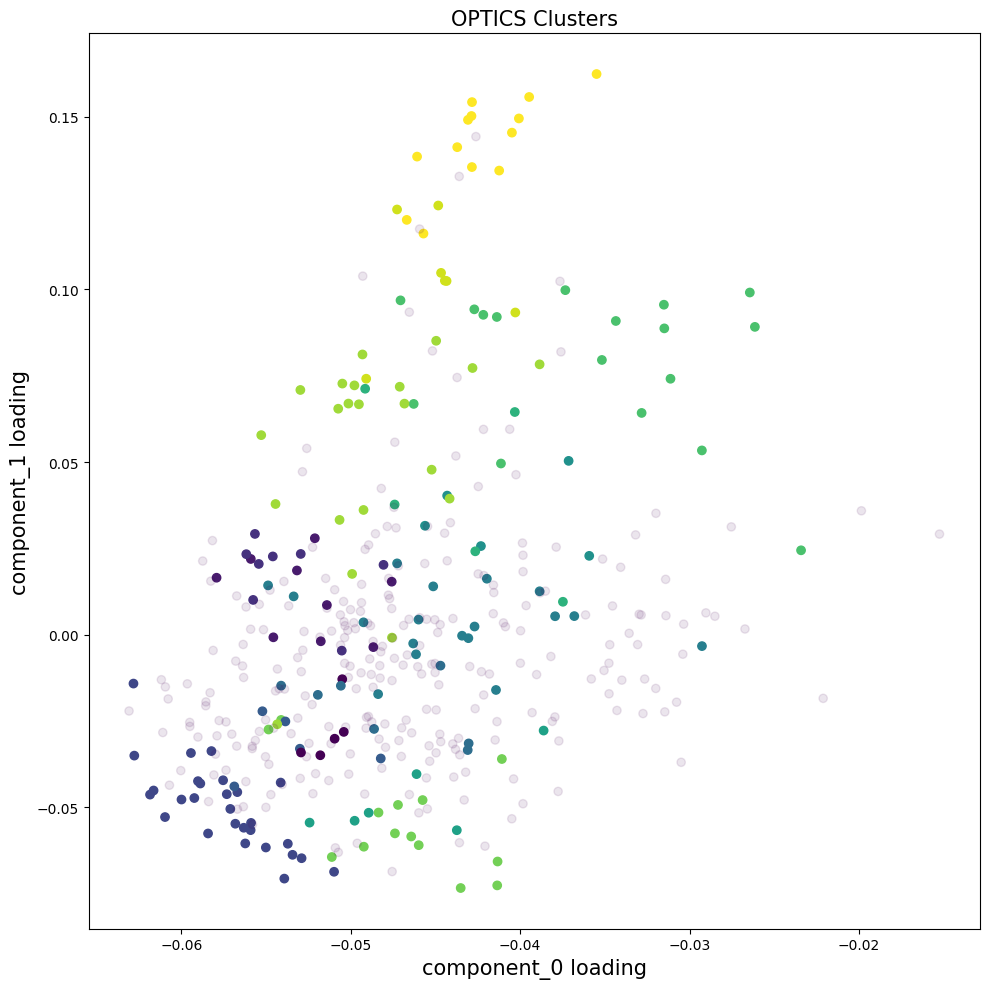

In [8]:
op.plot_clusters(n_dimensions=2)


## State 3: Select Pairs
### Apply Critera

Sarmento and Horta suggest four criteria to further filter the potential pairs to increase the probability of selecting pairs of securities whose prices will continue to mean revert in the future. 
* Statistically significant t-stat from the Engle-Granger test (5% level)
* Hurst exponent < 0.5  
* Half-life between [1, 252]   
* Spread must cross the mean on average 12x per year  

These four criteria indicate positive characteristics for potential pairs of securities. The Engle-Granger tests the pair for cointegration. A Hurst exponent below 0.5 indicates that the pair of prices regresses strongly to the mean. Pairs with extreme half-life values, below 1 or above 252, are excluded from the selected pairs. Extreme half-life values indicate a price series that either reverts too quickly or too slowly to be traded. Finally, the price series must cross the long-term spread mean on average 12 times a year. This enforces one trade on average, per month.

After filtering potential pairs, we find 7 pairs of securities that meet all four criteria. We plot the prices individual prices series and the beta-adjusted spread for each pair below.


### Engle-Granger Test

If $x_t$ and $y_t$ are non-stationary and order of integration d=1, then a linear combination of them must be stationary for some value of $\beta$ and $\mu_t$.   
<br>
<center> $y_t - \beta x_t = \mu_t$ ; where $\mu_t$ is stationary. </center>

### Hurst Exponent Calculation
The Hurst exponent, H, is used to measure the long-term memory of a time series. A value in the range of [0-0.5) indicates that a time series reverts strongly to the mean while a value of [0.5-1] indicates a time series with long-term positive autocorrelation and is likely to diverge. The Hurst exponent is calculated as: 

<br>
<center> $\begin{aligned} \mathbb{E}\big[\frac{R(n)}{S(n)}\big] = Cn^H , n \rightarrow \infty\end{aligned}$</center>
$R(n)$ is the range of the first $n$ cumulative deviations from the mean.  
$S(n)$ is the series of the first $n$ standard deviations.  
$\mathbb{E}$ is the expected value.  
$n$ is the number of observations in the time series.  
$C$ is a constant.  

### Half-life Calculation

The half-life of a series is the amount of time it takes for a series to return to half its initial value and is defined as: 

<br>
<center> $\begin{aligned} N(t) = N_0e^{-\lambda t} \end{aligned}$</center>
$N_0$ is the initial quantity of the spread that will decay.  
$N(t)$ is the quantity that still remains and has not yet decayed after a time $t$.  
$\lambda$ is a positive number called the decay constant.  

The half-life, $t_{1/2}$ is defined as:
<center> $\begin{aligned} t_{1/2} = \frac{ln(2)}{\lambda} \end{aligned}$</center>


Spreads with short half-lives indicate portfolios that revert to the mean often and create many trading opportunities.

### Calculate potential pair statistics

In [9]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

### Filter potential pairs

In [10]:
op.filter_pairs()
op.filtered_pairs

Found 16 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count,beta
51,"(CB, RE)",0.000671,0.433264,39.499212,14.288191,1.795580
180,"(SCHW, PNC)",0.007767,0.380500,54.965130,13.105092,0.391050
191,"(SCHW, HBAN)",0.005842,0.400847,47.409528,14.743229,4.105846
269,"(TFC, RJF)",0.002277,0.372850,45.214344,13.014085,1.471102
274,"(TFC, NTRS)",0.000367,0.351280,43.681652,12.104009,2.084629
277,"(TFC, GL)",0.013105,0.423275,59.315978,12.468039,2.428520
287,"(PNC, RJF)",0.000356,0.371560,35.731425,14.197183,2.142394
288,"(PNC, FITB)",0.031168,0.372945,75.241510,12.013001,5.158162
422,"(RF, ZION)",0.004786,0.408449,40.308594,12.923077,0.356420
790,"(K, SJM)",0.001600,0.493938,51.543903,14.470206,0.400034


In [11]:
optimal_pairs = op.filtered_pairs['pair'].values

valid_tickers = []

for pair in optimal_pairs:
    if pair[0] not in valid_tickers:
        valid_tickers.append(pair[0])
    if pair[1] not in valid_tickers:
        valid_tickers.append(pair[1])

#print out all tickers we need data for
print(valid_tickers)

#initialize backtrader cerebro engine
cerebro = bt.Cerebro()

# add observers for backtesting analysis
cerebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.Trades)
cerebro.addobserver(bt.observers.BuySell)

# add Sharpe Ratio metric for backtesting analysis
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='sharpe')

# add datafeed for each ticker to cerebro
for ticker in valid_tickers:

    # download full OHLC ticker data from yfinance for test dataset
    ticker_data = yf.download(ticker, start=test_start_date, end=test_end_date, progress=False)

    # create Backtrader DataFeed from ticker_data
    data_feed = bt.feeds.PandasData(dataname=ticker_data, close='Close',
        open='Open', high='High', low='Low', volume='Volume', openinterest=None,
        plot=False)
    
    # add DataFeed to cerebro
    cerebro.adddata(data_feed, name=ticker)
    

class TestStrategy(bt.Strategy):

    def __init__(self):
        self.days = 0 # tracks days passed
        self.open_orders = [] # tracks open orders

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def notify_order(self, order):

        if order.status in [order.Submitted, order.Accepted]:
            # An active Buy/Sell order has been submitted/accepted - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, {order.executed.price:.2f}')
            elif order.issell():
                self.log(f'SELL EXECUTED, {order.executed.price:.2f}')
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')


    # main loop of strategy
    def next(self):

        self.days += 1

        # loop through all pairs
        for pair in optimal_pairs:

            # get LineBuffer datafeed values for both securities
            security_0_feed = self.datas[valid_tickers.index(pair[0])].close
            security_1_feed = self.datas[valid_tickers.index(pair[1])].close

            # convert LineBuffer datafeed values to raw numpy arrays
            security_0_raw = np.asarray(security_0_feed.get(size=self.days))
            security_1_raw = np.asarray(security_1_feed.get(size=self.days))

            # get historical values for both securities
            security_0_hist = train[pair[0]].values
            security_1_hist = train[pair[1]].values

            #combine historical and updated data
            security_0_final = pd.Series(np.concatenate((security_0_hist, security_0_raw)))
            security_1_final = pd.Series(np.concatenate((security_1_hist, security_1_raw)))


            pair_prices = None

            # create pair prices variable based on ind/dep variable assignment (x, y)
            pair_var = op.pair_variables[op.filtered_pairs.index[0]]
            if pair_var['x'] == pair[0] and pair_var['y'] == pair[1]:
                pair_prices = (security_0_final, security_1_final)
            else:
                pair_prices = (security_1_final, security_0_final)

            # get updated norm spread for pair
            norm_spread = op.calc_updated_norm_spread(pair_prices)

            # print(norm_spread.shape)

            # get fixed beta value of spread
            beta = op.fixed_betas[op.filtered_pairs.index[0]]

            if beta <= 1:
                if norm_spread[-2] < 2 and norm_spread[-1] >= 2 and (dict({'pair': pair, 'position': 'long'}) not in self.open_orders) and (dict({'pair': pair, 'position': 'short'}) not in self.open_orders):
                    print("enter short")

                    # buy $B of X and sell $1 of Y
                    self.buy(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)

                    # add order as an open order
                    self.open_orders.append(dict({'pair': pair, 'position': 'short'}))


                elif norm_spread[-2] > -2 and norm_spread[-1] <= -2 and (dict({'pair': pair, 'position': 'long'}) not in self.open_orders) and (dict({'pair': pair, 'position': 'short'}) not in self.open_orders):
                    print("enter long")

                    # buy $1 of Y and sell $B of X
                    self.buy(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)

                    # add order as an open order
                    self.open_orders.append(dict({'pair': pair, 'position': 'long'}))

                
                if dict({'pair': pair, 'position': 'long'}) in self.open_orders and norm_spread[-2] < 0 and norm_spread[-1] >= 0:
                    print("exit long")

                    # opposite of enter long
                    self.buy(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)

                    # remove order as an open order
                    self.open_orders.remove(dict({'pair': pair, 'position': 'long'}))

                    

                elif dict({'pair': pair, 'position': 'short'}) in self.open_orders and norm_spread[-2] > 0 and norm_spread[-1] <= 0:
                    print("exit short")

                    # opposite of enter short
                    self.buy(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)

                    # remove order as an open order
                    self.open_orders.remove(dict({'pair': pair, 'position': 'short'}))
                    

            else:
                if norm_spread[-2] < 2 and norm_spread[-1] >= 2 and (dict({'pair': pair, 'position': 'long'}) not in self.open_orders) and (dict({'pair': pair, 'position': 'short'}) not in self.open_orders):
                    print("enter short")

                    # buy $1 of X and sell $1/B of Y
                    self.buy(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)

                    # add order as an open order
                    self.open_orders.append(dict({'pair': pair, 'position': 'short'}))

                elif norm_spread[-2] > -2 and norm_spread[-1] <= -2 and (dict({'pair': pair, 'position': 'long'}) not in self.open_orders) and (dict({'pair': pair, 'position': 'short'}) not in self.open_orders):
                    print("enter long")

                    # buy $1/B of Y and sell $1 of X
                    self.buy(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)

                    # add order as an open order
                    self.open_orders.append(dict({'pair': pair, 'position': 'long'}))


                if dict({'pair': pair, 'position': 'long'}) in self.open_orders and norm_spread[-2] < 0 and norm_spread[-1] >= 0:
                    print("exit long")
                    
                    # opposite of enter long
                    self.buy(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)

                    # remove order as an open order
                    self.open_orders.remove(dict({'pair': pair, 'position': 'long'}))

                elif dict({'pair': pair, 'position': 'short'}) in self.open_orders and norm_spread[-2] > 0 and norm_spread[-1] <= 0:
                    print("exit short")

                    # opposite of enter short
                    self.buy(data=self.datas[valid_tickers.index(pair_var['y'])], size=1)
                    self.sell(data=self.datas[valid_tickers.index(pair_var['x'])], size=1)

                    # remove order as an open order
                    self.open_orders.remove(dict({'pair': pair, 'position': 'short'}))


print("Initial Porfolio Value:", cerebro.broker.getvalue())

cerebro.addstrategy(TestStrategy)
strat = cerebro.run()


['CB', 'RE', 'SCHW', 'PNC', 'HBAN', 'TFC', 'RJF', 'NTRS', 'GL', 'FITB', 'RF', 'ZION', 'K', 'SJM', 'CPB', 'AVB', 'EQR', 'ESS', 'EIX', 'PPL', 'AEP', 'CMS', 'LNT']
Initial Porfolio Value: 10000.0
enter short
enter short
2021-01-05 BUY EXECUTED, 149.99
2021-01-05 SELL EXECUTED, 228.08
2021-01-05 BUY EXECUTED, 149.99
2021-01-05 SELL EXECUTED, 228.08
enter long
2021-01-06 BUY EXECUTED, 229.63
2021-01-06 SELL EXECUTED, 151.62
enter short
2021-01-08 BUY EXECUTED, 156.41
2021-01-08 SELL EXECUTED, 241.30
enter short
2021-01-11 BUY EXECUTED, 154.59
2021-01-11 SELL EXECUTED, 237.99
enter long
2021-01-14 BUY EXECUTED, 239.67
2021-01-14 SELL EXECUTED, 157.43
enter short
2021-01-15 BUY EXECUTED, 154.79
2021-01-15 SELL EXECUTED, 233.33
exit short
2021-01-19 BUY EXECUTED, 230.66
2021-01-19 SELL EXECUTED, 155.03
exit short
exit long
2021-02-01 BUY EXECUTED, 212.89
2021-02-01 SELL EXECUTED, 147.01
2021-02-01 BUY EXECUTED, 147.01
2021-02-01 SELL EXECUTED, 212.89
enter long
2021-03-09 BUY EXECUTED, 248.95


In [12]:
# %matplotlib inline

print('Sharpe Ratio:', strat[0].analyzers.sharpe.get_analysis())
print("Final Porfolio Value:", cerebro.broker.getvalue())

#cerebro.plot()

Sharpe Ratio: OrderedDict([('sharperatio', -2.753630313511014)])
Final Porfolio Value: 9925.850051879883


## Conclusion


This notebook demonstrates an empirical example of the pairs selection process outlined in [1] to efficiently reduce the search space and select quality trading pairs. Roughly 9 years of daily stock price data for 600 securities were reduced to 10 dimensions through principal component analysis. Next, over 300 potential trading pairs were identified through OPTICS clustering. Seven pairs from the clusters met the four selection criteria.

### Works Cited:
[1] Sarmento, Simão, and Nuno Horta. “A Machine Learning Based Pairs Trading Investment Strategy: Simão Sarmento.” Springer, Springer International Publishing, 2020, www.springer.com/gp/book/9783030472504.  

[2] M. Ankerst, M. M. Breunig, H.-P. Kriegel, and J. Sander, “Optics: ordering points to identify the clustering structure,” in ACM Sigmod record, vol. 28, no. 2. ACM, 1999, pp. 49–60.
